In [2]:
import pandas as pd
import numpy as np
from my_libs import lib_tools as pt # Project Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date, datetime

start_year = 2005      # Année de début de période d'étude
end_year   = 2021      # Année de fin de période d'étude   
chk        = True      # Affichage de log des checks
sampled    = True      # Travail sur données samplées de df

df, dic_usagers, dic_caract, dic_lieux, dic_vehic = pt.get_work_df(start_year, end_year, sampled, chk)


usagers :
somme des lignes 'dic': 2509620
nombre de lignes 'df' : 2509620
nombre de doublons avant traîtement : 2858
nombre de doublons après traîtement : 0

caractéristiques :
somme des lignes 'dic': 1121571
nombre de lignes 'df' : 1121571
nombre de doublons avant traîtement : 0
nombre de doublons après traîtement : 0

véhicules :
somme des lignes 'dic': 1914902
nombre de lignes 'df' : 1914902
nombre de doublons avant traîtement : 0
nombre de doublons après traîtement : 0
Véhicules en doublons vis à vis de la clé fonctionnelle avant traitement : 53
Véhicules en doublons vis à vis de la clé fonctionnelle après traitement : 0

lieux :
somme des lignes 'dic': 1121571
nombre de lignes 'df' : 1121571
nombre de doublons avant traîtement : 0
nombre de doublons après traîtement : 0


In [3]:
display_stat_data_load = chk

if display_stat_data_load:
    pt.display_stats_data_load(dic_usagers, dic_caract, dic_lieux, dic_vehic, start_year, end_year)


usagers : 

usagers 2005 : 12 colonnes x 197498 lignes
usagers 2006 : 12 colonnes x 187085 lignes
usagers 2007 : 12 colonnes x 188457 lignes
usagers 2008 : 12 colonnes x 170960 lignes
usagers 2009 : 12 colonnes x 165962 lignes
usagers 2010 : 12 colonnes x 154192 lignes
usagers 2011 : 12 colonnes x 148543 lignes
usagers 2012 : 12 colonnes x 138628 lignes
usagers 2013 : 12 colonnes x 128694 lignes
usagers 2014 : 12 colonnes x 132186 lignes
usagers 2015 : 12 colonnes x 130378 lignes
usagers 2016 : 12 colonnes x 133422 lignes
usagers 2017 : 12 colonnes x 136021 lignes
usagers 2018 : 12 colonnes x 130169 lignes
usagers 2019 : 15 colonnes x 132977 lignes
usagers 2020 : 15 colonnes x 105295 lignes
usagers 2021 : 15 colonnes x 129153 lignes

nombre de lignes min : 105295
nombre de lignes max : 197498

caract : 

caract 2005 : 16 colonnes x 87026 lignes
caract 2006 : 16 colonnes x 82993 lignes
caract 2007 : 16 colonnes x 83850 lignes
caract 2008 : 16 colonnes x 76767 lignes
caract 2009 : 16 co

### Suppression des colonnes jugées non pertinentes

In [4]:
# relatives à une info géographique trop fine
cols_rmv = ['com', 'adr', 'lat', 'long', 'pr', 'pr1']
for col in cols_rmv:
    if col in df.columns:
        df = df.drop(columns=cols_rmv, axis=1)

# non connue en pratique avant l'accident
cols_rmv = ['obs', 'obsm', 'choc', 'manv', 'col']
for col in cols_rmv:
    if col in df.columns:
        df = df.drop(columns=cols_rmv, axis=1)

### Représentation graphique des *Null* - Suppression de variables avec plus de 8 % de Null

Colonnes supprimées : Index(['v2', 'motor', 'vma', 'secu2', 'secu1', 'id_vehicule', 'secu3', 'gps',
       'v1', 'lartpc', 'secu', 'env1', 'occutc', 'larrout', 'voie'],
      dtype='object')

             column_name  rate_missing
v2                    v2        95.240
motor              motor        85.460
vma                  vma        85.455
secu2              secu2        85.455
secu1              secu1        85.455
id_vehicule  id_vehicule        85.455
secu3              secu3        85.455
gps                  gps        56.750
v1                    v1        56.285
lartpc            lartpc        19.640
secu                secu        16.675
env1                env1        15.155
occutc            occutc        14.360
larrout          larrout        10.390
voie                voie         9.065
place              place         4.950
actp                actp         2.185
etatp              etatp         2.180
locp                locp         2.175
infra              infra    

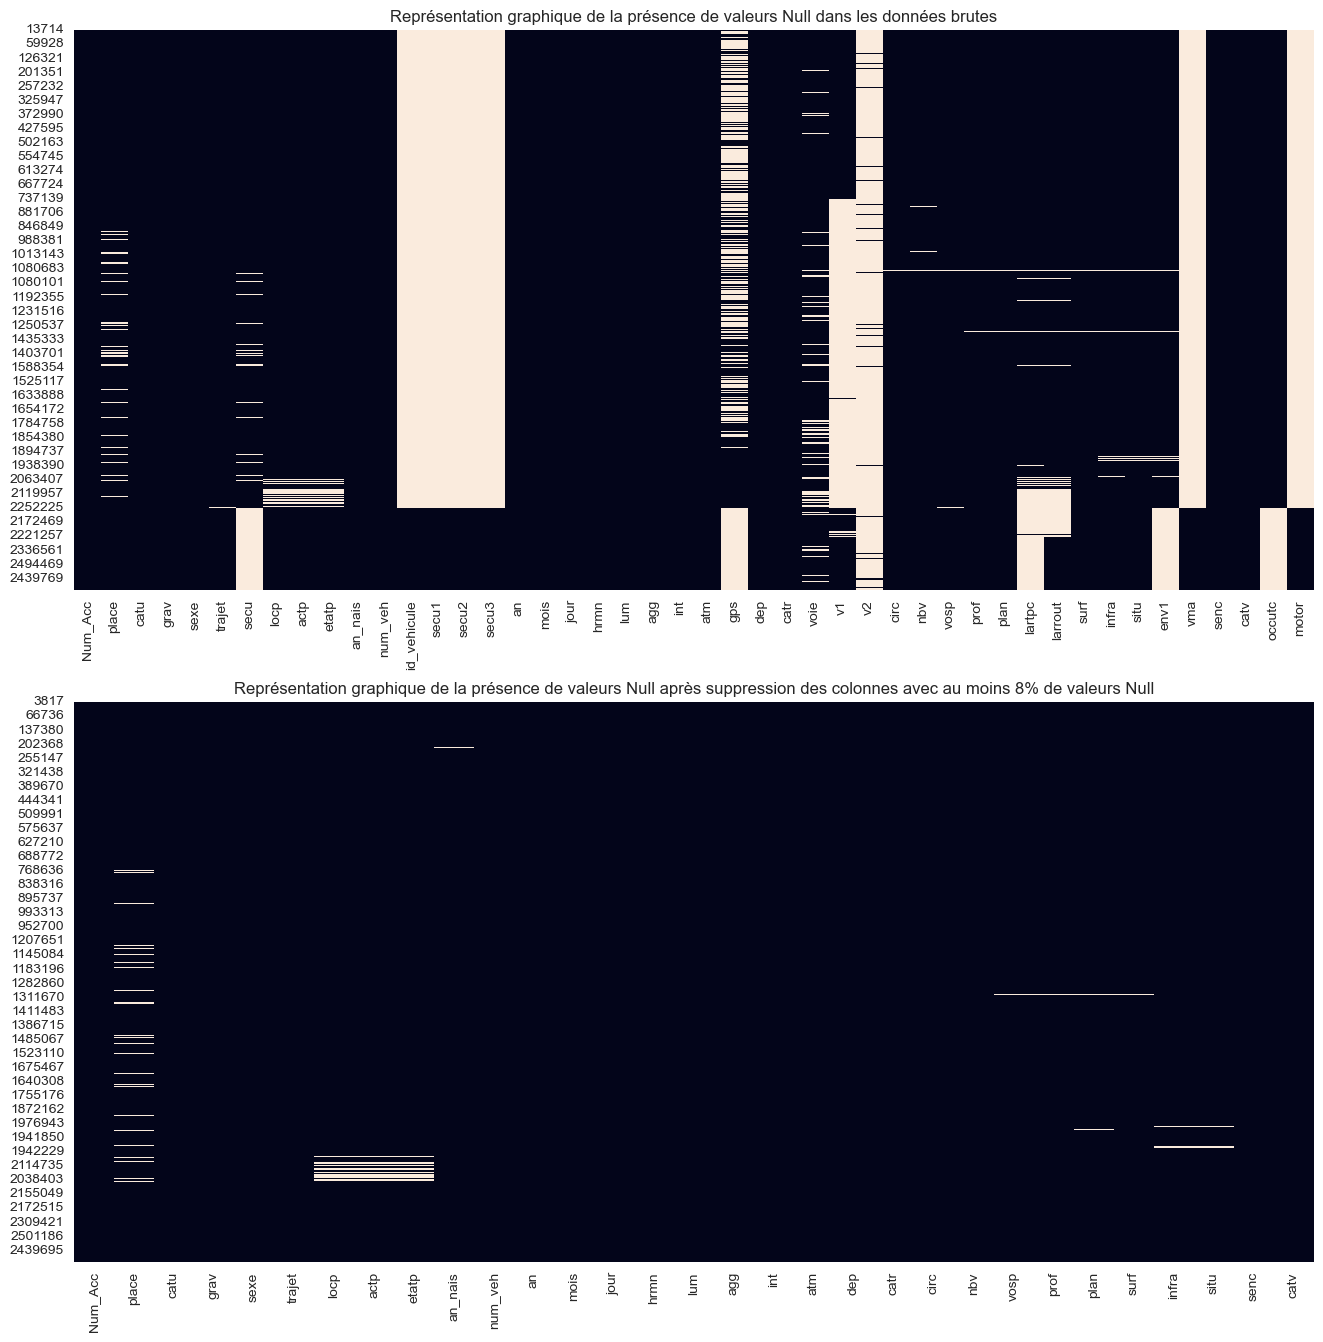

In [5]:
df_sample = df.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(16, 16)
ax[0].set_title('Représentation graphique de la présence de valeurs Null dans les données brutes')
sns.heatmap(df_sample.isna(), cbar=False, ax=ax[0]);

df = pt.rmv_col_too_much_null(df, 0.08, chk)

df_sample = df.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

ax[1].set_title('Représentation graphique de la présence de valeurs Null après suppression des colonnes avec au moins 8% de valeurs Null')
sns.heatmap(df_sample.isna(), cbar=False, ax=ax[1]);

### Transformation des  *Null* restants en -1 (non renseigné) pour les colonnes qui l'autorisent

In [6]:
df = pt.clean_categ_not_specified(df)

### Nettoyage de l'année de naissance

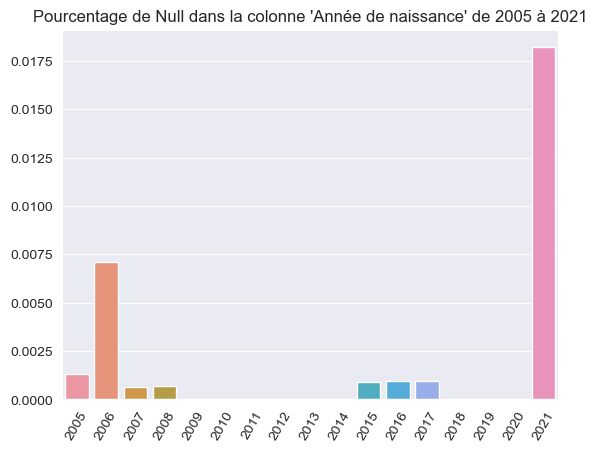

In [7]:
df[df.an_nais.isna()].shape[0]
df[df.an_nais.isna()].an.value_counts()

years = []
rate_nan = []
for year in range(start_year, end_year+1):
    years.append(year)
    rate_nan.append(df[(df.an_nais.isna()) & (df.an==year)].shape[0] / df[df.an==year].shape[0])

plt.title(f"Pourcentage de Null dans la colonne 'Année de naissance' de {start_year} à {end_year}")
ax = sns.barplot(x=years, y=rate_nan)
plt.xticks(rotation=60);

In [8]:
print("Suppression des lignes avec Null : ")
nb_bef = df.shape[0]
print(f"Nombre de lignes avant : {nb_bef}")

df = df.dropna(axis = 0, how = 'any')
nb_aft = df.shape[0]
print(f"Nombre de lignes après : {nb_aft}")
print(f"Taux de perte : {(nb_bef-nb_aft)/nb_aft*100:.2f} %")

Suppression des lignes avec Null : 
Nombre de lignes avant : 20000
Nombre de lignes après : 19964
Taux de perte : 0.18 %


### Création de *age*

In [9]:
df = pt.create_col_age(df)

### Ré-encodeages :*dep*,  *nbv*, *catv*, *senc*

In [10]:
df = pt.clean_col_dep(df, True)
df = pt.clean_nbv(df)
df = pt.clean_catv(df)
df = pt.clean_senc(df)

Départements avant nettoyage : 
['01' '010' '02' '020' '03' '030' '04' '040' '05' '050' '06' '060' '07'
 '070' '08' '080' '09' '090' '1' '10' '100' '11' '110' '12' '120' '13'
 '130' '14' '140' '15' '150' '16' '160' '17' '170' '18' '180' '19' '190'
 '2' '20' '201' '202' '21' '210' '22' '220' '23' '230' '24' '240' '25'
 '250' '26' '260' '27' '270' '28' '280' '29' '290' '2A' '2B' '3' '30'
 '300' '31' '310' '32' '320' '33' '330' '34' '340' '35' '350' '36' '360'
 '37' '370' '38' '380' '39' '390' '4' '40' '400' '41' '410' '42' '420'
 '43' '430' '44' '440' '45' '450' '46' '460' '47' '470' '48' '480' '49'
 '490' '5' '50' '500' '51' '510' '52' '520' '53' '530' '54' '540' '55'
 '550' '56' '560' '57' '570' '58' '580' '59' '590' '6' '60' '600' '61'
 '610' '62' '620' '63' '630' '64' '640' '65' '650' '66' '660' '67' '670'
 '68' '680' '69' '690' '7' '70' '700' '71' '710' '72' '720' '73' '730'
 '74' '740' '75' '750' '76' '760' '77' '770' '78' '780' '79' '790' '8'
 '80' '800' '81' '810' '82' '820' '83'

### Affichage des modes des variables catégorielles restantes

In [11]:
# var_categ = df.select_dtypes('Int64').columns
var_categ = df.columns
col_excluded = ['Num_Acc', 'num_veh', 'age', 'hrmn', 'an', 'jour', 'an_nais', 'datetime', 'dep']

for col in var_categ:
    if not (col in col_excluded):
        modes = list(df[col].unique())
        print(f"{col}\t: {modes}")            
#         print(f"{modes}")            

place	: [1, 2, 8, 5, -1, 0, 4, 3, 9, 10, 7, 6]
catu	: [1, 2, 3, 4]
grav	: [4, 3, 1, 2]
sexe	: [1, 2]
trajet	: [9, 0, 3, 5, 2, 4, 1, -1]
locp	: [0, 2, -1, 1, 4, 3, 6, 5, 8, 9, 7]
actp	: ['0', '5', '3', ' -1', -1, '1', '9', '2', '4', '6', 'A', 'B']
etatp	: [0, 2, -1, 1, 3]
mois	: [12, 9, 6, 4, 3, 5, 1, 2, 10, 7, 8, 11]
lum	: [1, 5, 3, 2, 4]
agg	: [2, 1]
int	: [2, 9, 1, 4, 3, 7, 5, 6, 8, 0]
atm	: [1, 2, 7, 9, 3, 8, 6, 5, 4, -1]
catr	: [3, 4, 1, 9, 2, 6, 7, 5]
circ	: [2, 1, 0, 3, 4, -1]
nbv	: [2, 0, 1, 4, 3, 5, 6, -1]
vosp	: [0, 3, 2, -1, 1]
prof	: [1, 0, 2, 4, 3, -1]
plan	: [1, 0, 3, 2, 4, -1]
surf	: [1, 2, 8, 7, 0, 9, 4, 3, -1, 5, 6]
infra	: [0, 2, 5, -1, 4, 3, 1, 9, 6, 7, 8]
situ	: [1, 0, 3, 8, 4, 5, 6, 2, -1]
senc	: [-1, 1, 2]
catv	: [7, -1, 30, 10, 2, 33, 1]


###  Nettoyage de *hrmn* et création de *datetime* - *joursem* - *grav_lbl*

In [12]:
df = pt.clean_hrmn(df)

df = pt.create_col_datetime(df)
df = pt.create_col_joursem(df)
df = pt.create_col_grav_lbl(df)

### Suppression des colonnes inutiles : *an_nais*

In [13]:
df = df.drop(columns=['an_nais'], axis=1)

### Analyses croisées

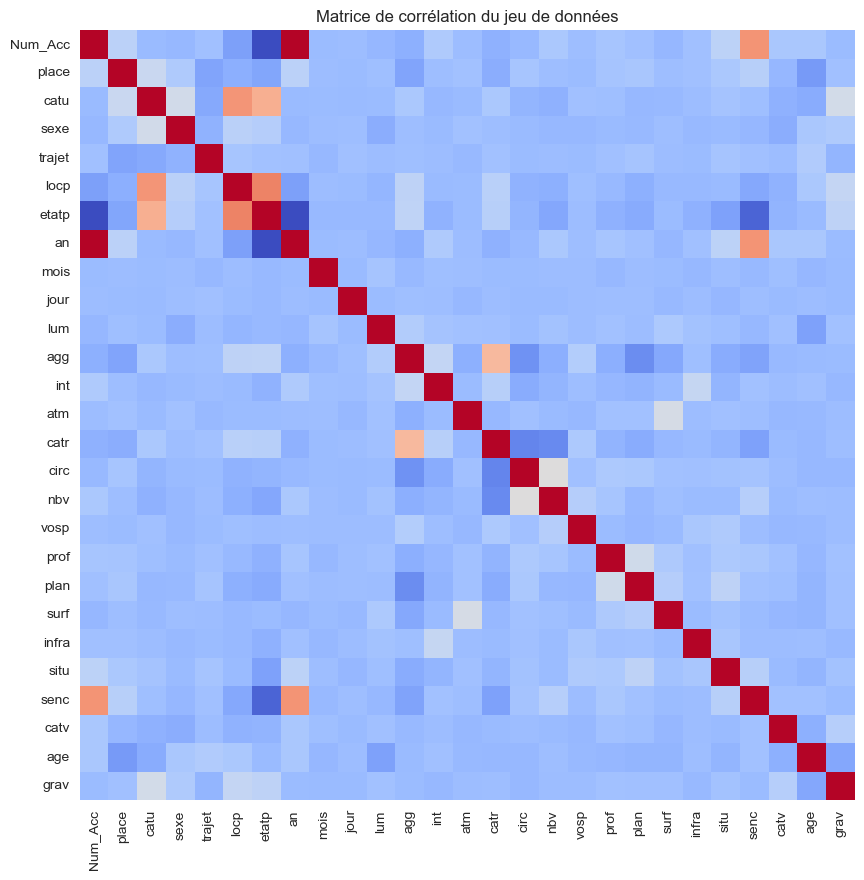

In [14]:
target = df['grav']
data = df.drop(columns=['grav'], axis=1)
# set 'grav' as last column of data
data['grav'] = target

ds = data.sample(10000)
corr = ds.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=False) 
ax.set_title(f"Matrice de corrélation du jeu de données");

In [15]:
# target = df['grav']
# data = df.drop(columns=['grav'], axis=1)
# # set 'grav' as last column of data
# data['grav'] = target

# ds = data.sample(10000)
# corr1 = ds[ds.grav == 1].corr()

# ds = data.sample(10000)
# corr2 = ds[ds.grav == 2].corr()

# ds = data.sample(10000)
# corr3 = ds[ds.grav == 3].corr()

# ds = data.sample(10000)
# corr4 = ds[ds.grav == 4].corr()

# fig, axs = plt.subplots(nrows=2, ncols=2)
# fig.set_size_inches(15, 15)

# axs[0,0].set_title('grav = Indemne')
# sns.heatmap(corr1, annot=False, cmap='coolwarm', ax=axs[0,0], cbar=False) 

# axs[0,1].set_title('grav = Tué')
# sns.heatmap(corr2, annot=False, cmap='coolwarm', ax=axs[0,1], cbar=False) 

# axs[1,0].set_title('grav = Blessé hospitalisé')
# sns.heatmap(corr3, annot=False, cmap='coolwarm', ax=axs[1,0], cbar=False) 

# axs[1,1].set_title('grav = Blessé léger')
# sns.heatmap(corr4, annot=False, cmap='coolwarm', ax=axs[1,1], cbar=False);

grav_lbl  Blessé hospitalisé  Blessé léger   Indemne       Tué
joursem                                                       
lundi               0.192060      0.366730  0.418147  0.023062
mardi               0.195198      0.366040  0.422060  0.016701
mercredi            0.195978      0.368780  0.418882  0.016360
jeudi               0.197806      0.359519  0.423213  0.019462
vendredi            0.203675      0.367534  0.403675  0.025115
samedi              0.217170      0.345775  0.402443  0.034611
dimanche            0.236150      0.366761  0.363526  0.033562


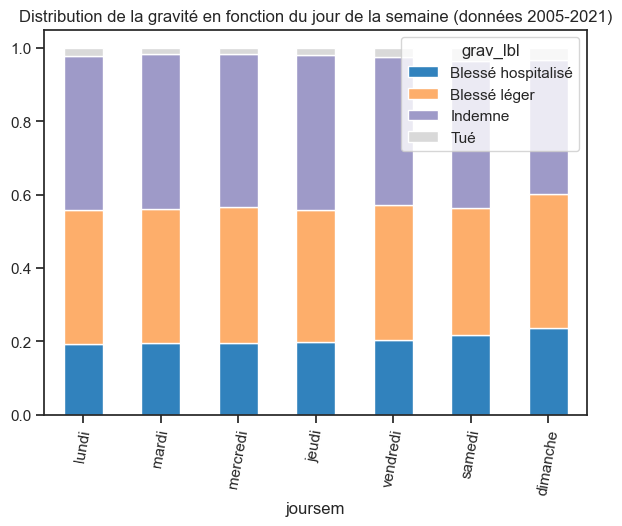

In [16]:
colormap = 'tab20c'
df_cross = pd.crosstab(df['joursem'], df['grav_lbl'], normalize='index')
df_cross = df_cross.reindex(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
print(df_cross)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                      title=f"Distribution de la gravité en fonction du jour de la semaine (données {start_year}-{end_year})", 
                      colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

C:\Users\nicol\AppData\Local\Temp\ipykernel_14512\2773521519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['sexe'] = df_tmp['sexe'].astype('str').replace(['1','2'], ['masculin', 'féminin'])


grav_lbl  Blessé hospitalisé  Blessé léger   Indemne       Tué
sexe                                                          
féminin             0.196030      0.429605  0.357747  0.016618
masculin            0.209283      0.330784  0.432380  0.027553
sexe                 féminin  masculin
grav_lbl                              
Blessé hospitalisé  0.311339  0.688661
Blessé léger        0.385316  0.614684
Indemne             0.285381  0.714619
Tué                 0.225470  0.774530


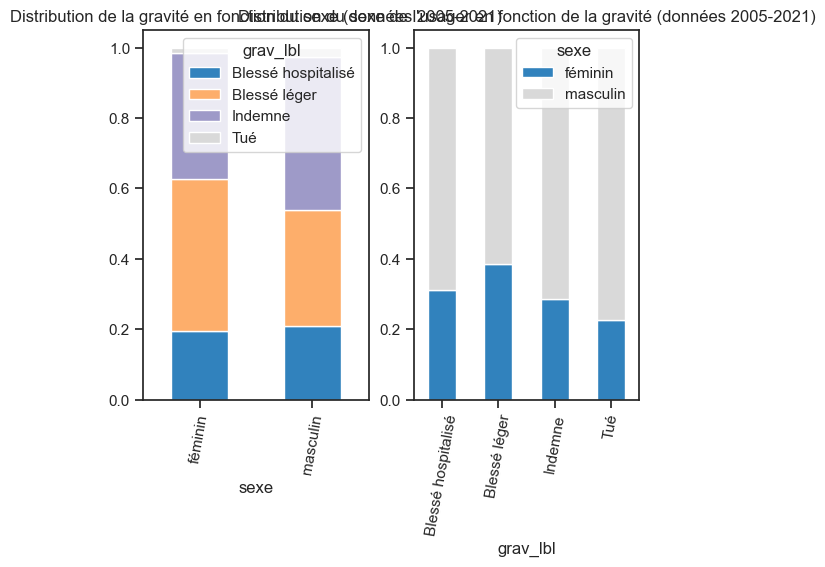

In [17]:
colormap = 'tab20c'

df_tmp = df[['sexe', 'grav_lbl']]
df_tmp['sexe'] = df_tmp['sexe'].astype('str').replace(['1','2'], ['masculin', 'féminin'])
df_cross_1 = pd.crosstab(df_tmp['sexe'], df_tmp['grav_lbl'], normalize='index')
df_cross_2 = pd.crosstab(df_tmp['grav_lbl'], df_tmp['sexe'], normalize='index')

print(df_cross_1)
print(df_cross_2)

sns.set_theme(style="ticks")

fig, axs = plt.subplots(1,2)
chart = df_cross_1.plot(kind="bar", stacked=True, rot=0, ax=axs[0], 
                      title=f"Distribution de la gravité en fonction du sexe (données {start_year}-{end_year})", 
                      colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")

chart = df_cross_2.plot(kind="bar", stacked=True, rot=0, ax=axs[1], 
                      title=f"Distribution du sexe de l'usager en fonction de la gravité (données {start_year}-{end_year})", 
                      colormap=colormap)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
sns.move_legend(ax, "upper right")


### Evolution de gravité *Blessé hospitalisé* en 2019?

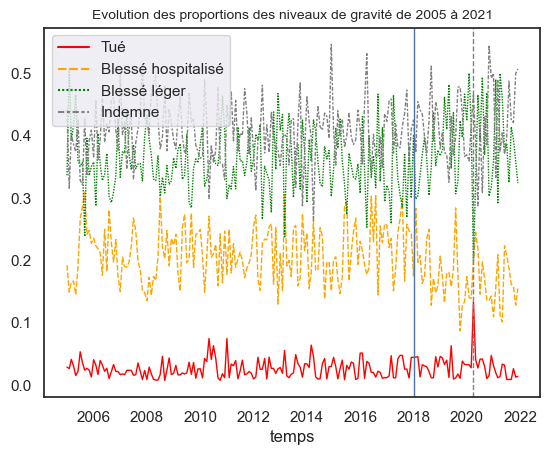

In [18]:
tue     = []
bless_l = []
bless_h = []
indemne = []
y_m     = []
years   = range(start_year, end_year+1)
months  = range(1, 13)

import datetime

df_tmp = df

for year in years:
    for month in months:
#         df_tmp = df[(df.datetime.dt.year == year) & (df.datetime.dt.month == month)]
        df_tmp = df[(df.an==year) & (df.mois==month)]
        if 2 in df_tmp.grav.value_counts(normalize=True).index: 
            tue.append(df_tmp.grav.value_counts(normalize=True)[2]) 
        else :
            tue.append(tue[-1])
        if 3 in df_tmp.grav.value_counts(normalize=True).index: 
            bless_h.append(df_tmp.grav.value_counts(normalize=True)[3])
        else:
            bless_h.append(bless_h[-1])
        if 4 in df_tmp.grav.value_counts(normalize=True).index: 
            bless_l.append(df_tmp.grav.value_counts(normalize=True)[4])
        else:
            bless_l.append(bless_l[-1])
        if 1 in df_tmp.grav.value_counts(normalize=True).index: 
            indemne.append(df_tmp.grav.value_counts(normalize=True)[1])
        else:
            indemne.append(indemne[-1])
        y_m.append(datetime.datetime(year, month, 1))

  
data = pd.DataFrame({'Tué':tue, 'Blessé hospitalisé':bless_h, 'Blessé léger':bless_l, 'Indemne':indemne, 'temps':y_m})
data = data.set_index('temps')

sns.set_theme(style="white", palette=None)
ax = sns.lineplot(data=data, palette=['red','orange','green','gray'], linewidth=1) #.set_title("Evolution des proportions des niveaux de gravité en fonction du temps")
ax.axes.set_title(f"Evolution des proportions des niveaux de gravité de {start_year} à {end_year}",fontsize=10)
sns.set(rc={'figure.figsize':(15,6)})
plt.axvline(datetime.datetime(2018, 1, 1), linewidth=1)
plt.axvline(datetime.datetime(2020, 4, 1), linestyle='--', color='gray', linewidth=1)
plt.legend(loc='upper left');

In [19]:
# colormap = 'tab20c'
# col = 'place'

# col_excluded = ['Num_Acc', 'num_veh', 'age', 'hrmn', 'dep', 'an', 'jour', 'an_nais']

# sns.set_theme(style="ticks")
# fig, axs = plt.subplots(7,4)
# fig.set_size_inches(20, 15)
# axs = np.reshape(axs, -1)
# plt.show()

# k = 0
# for col in df.columns:
#     if not (col in col_excluded) and (k <= 1):    
# #         if (k%5 == 0) : 
#         print(k)
#         df_cross = pd.crosstab(df[col], df.grav_lbl, normalize='index')
#         chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=axs[k], title=f"{col}", colormap=colormap)
# #         axs[k].yaxis.set_visible(False)
# #         chart.set_xticklabels(chart.get_xticklabels(), rotation=80)        
#         k += 1

In [20]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19964 entries, 1411043 to 2145645
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Num_Acc   19964 non-null  int64         
 1   place     19964 non-null  Int64         
 2   catu      19964 non-null  Int64         
 3   grav      19964 non-null  Int64         
 4   sexe      19964 non-null  Int64         
 5   trajet    19964 non-null  Int64         
 6   locp      19964 non-null  Int64         
 7   actp      19964 non-null  object        
 8   etatp     19964 non-null  Int64         
 9   num_veh   19964 non-null  object        
 10  an        19964 non-null  Int64         
 11  mois      19964 non-null  Int64         
 12  jour      19964 non-null  Int64         
 13  hrmn      19964 non-null  object        
 14  lum       19964 non-null  Int64         
 15  agg       19964 non-null  Int64         
 16  int       19964 non-null  Int64         
 17  atm 

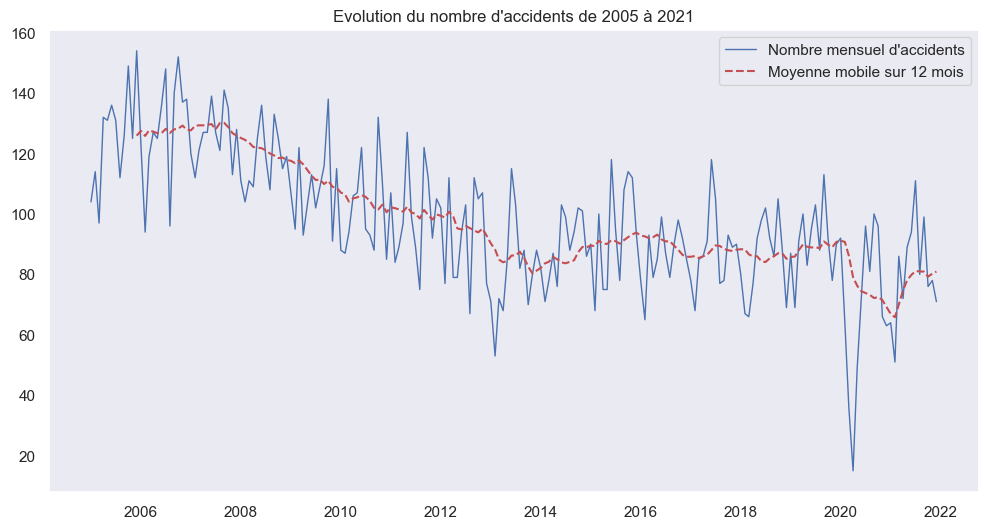

In [21]:
acc    = []
y_m    = []
years  = range(start_year, end_year+1)
months = range(1, 13)

import datetime

df_tmp = df

for year in years:
    for month in months:
        df_tmp = df[(df.an==year) & (df.mois==month)]
        acc.append(df_tmp.shape[0])
        y_m.append(datetime.datetime(year, month, 1))
  
df_acc = pd.DataFrame({'Accidents':acc, 'temps':y_m})
df_acc = df_acc.set_index('temps')

acc_ma = df_acc.Accidents.rolling(12).mean()
df_acc_ma = pd.DataFrame({'Moy mobile':acc_ma, 'temps':y_m})
df_acc_ma = df_acc_ma.set_index('temps')

plt.figure(figsize=(12,6))
plt.plot(df_acc, 'b', linewidth=1, label=f"Nombre mensuel d'accidents")
plt.plot(df_acc_ma, 'r', linestyle='dashed', label=f"Moyenne mobile sur 12 mois")
plt.title(f"Evolution du nombre d'accidents de {start_year} à {end_year}")
plt.grid()
plt.legend();

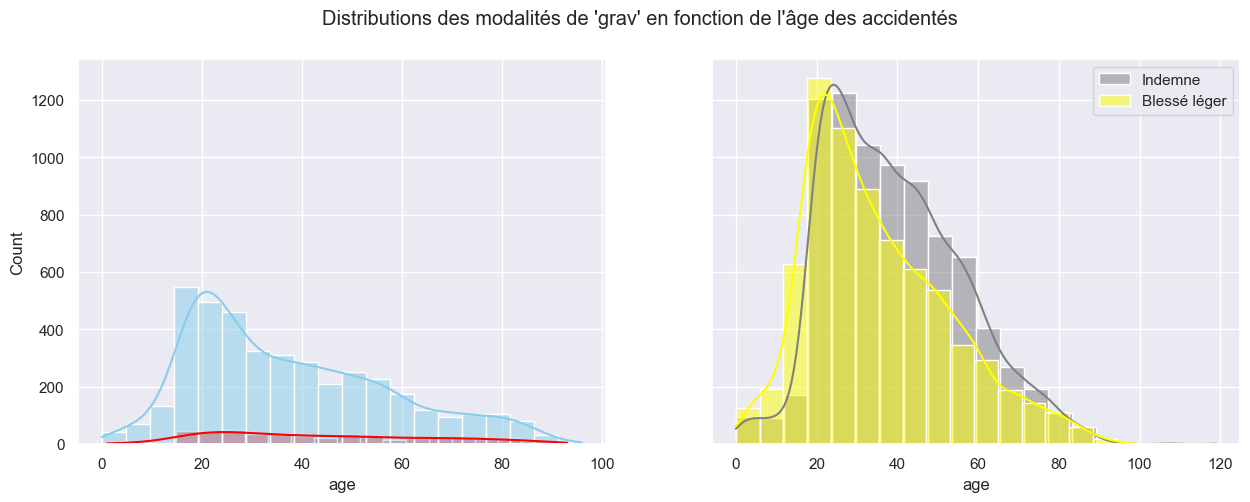

In [22]:
# sns.histplot(data=df[df.grav==2], x='age', bins=30)
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle(f"Distributions des modalités de 'grav' en fonction de l'âge des accidentés")
sns.histplot(data=df[df.grav==2], x="age", color="red", label="Tué", kde=True, bins=20, ax=axs[0])
sns.histplot(data=df[df.grav==3], x="age", color="skyblue", label="Blessé hospitalisé", kde=True, bins=20, ax=axs[0])
sns.histplot(data=df[df.grav==1], x="age", color="gray", label="Indemne", kde=True, bins=20, ax=axs[1])
sns.histplot(data=df[df.grav==4], x="age", color="yellow", label="Blessé léger", kde=True, bins=20, ax=axs[1])

plt.legend();

In [23]:
print(f"Proportion de tués : {df[df.grav==2].shape[0]/df.shape[0]}")
print(f"Proportion de blessés hospitalisés : {df[df.grav==3].shape[0]/df.shape[0]}")
print(f"Proportion de blessés légers : {df[df.grav==4].shape[0]/df.shape[0]}")
print(f"Proportion de personnes indemnes : {df[df.grav==1].shape[0]/df.shape[0]}")

Proportion de tués : 0.02399318773792827
Proportion de blessés hospitalisés : 0.20496894409937888
Proportion de blessés légers : 0.36295331596874375
Proportion de personnes indemnes : 0.4080845521939491


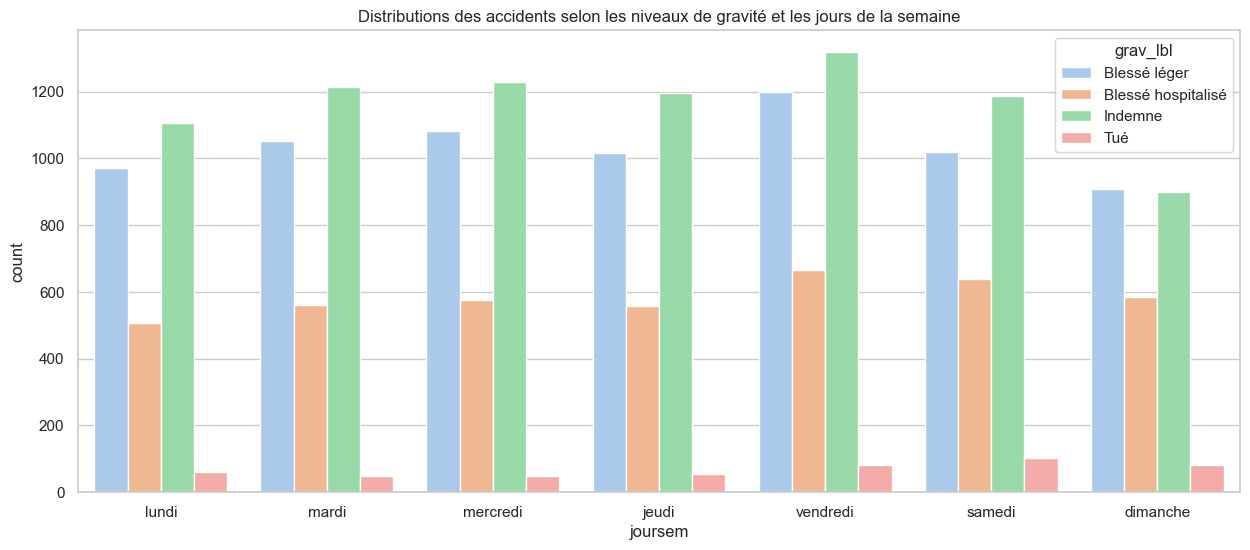

In [24]:
sns.set_theme(style="whitegrid", palette="pastel")
df_tmp = df[['grav_lbl', 'joursem']]
plt.title(f"Distributions des accidents selon les niveaux de gravité et les jours de la semaine")
ax = sns.countplot(data=df_tmp, x="joursem", hue="grav_lbl", 
                   order=['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']);



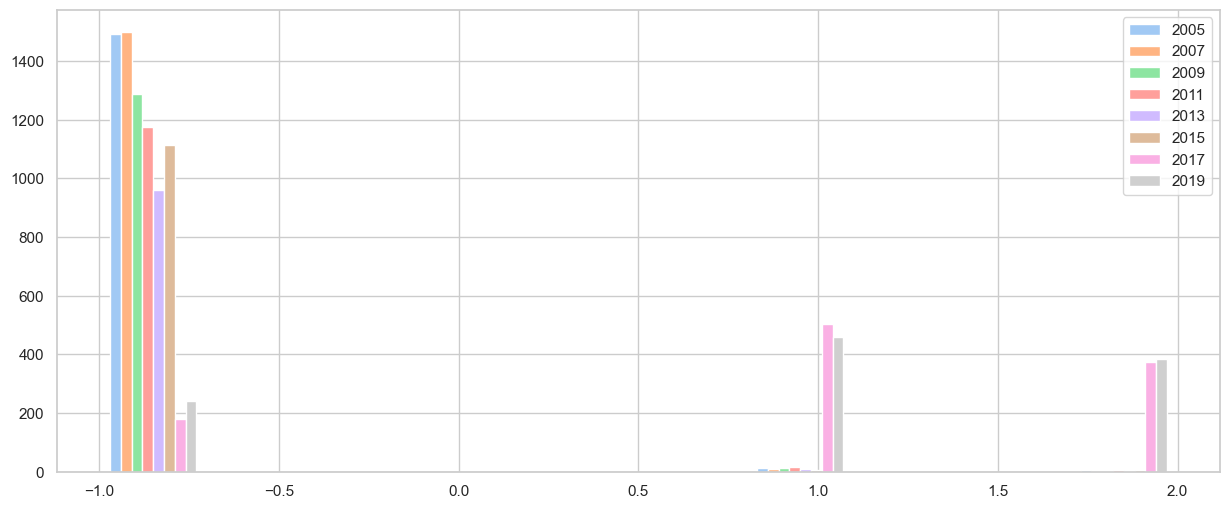

In [25]:
df.senc.unique()
df_lst = []
for year in np.arange(start_year, end_year, 2):
    df_lst.append(df[df.an==year].senc)
        
   
plt.hist(df_lst, label=np.arange(start_year, end_year, 2));
plt.legend()